# Draw tragectories of floats


In [3]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

DATA_DIR = f'../data/original_data/Atlantic_2019_03'


float_numbers = [
    '4903217',
    '4903218',
    '4903220', 
    '4903052',
    '4903054',
]


In [4]:
float_number = float_numbers[0]
data_file = os.path.join(DATA_DIR, f'PR_PF_{float_number}.csv')
df = pd.read_csv(data_file)
df

,PLATFORM_CODE,DATE (YYYY-MM-DDTHH:MI:SSZ),DATE_QC,LATITUDE (degree_north),LONGITUDE (degree_east),POSITION_QC,PRES (decibar),PRES_QC,PSAL (psu),PSAL_QC,...,PRES_ADJUSTED_ERROR (decibar),PRES_ADJUSTED_ERROR_QC,TEMP_ADJUSTED (degree_Celsius),TEMP_ADJUSTED_QC,TEMP_ADJUSTED_ERROR (degree_Celsius),TEMP_ADJUSTED_ERROR_QC,PSAL_ADJUSTED (psu),PSAL_ADJUSTED_QC,PSAL_ADJUSTED_ERROR (psu),PSAL_ADJUSTED_ERROR_QC
0,4903217,2019-03-21T05:06:47Z,1,19.53075,-35.01803,1,0.96,1,36.731,1,...,2.4,0.0,23.610,1.0,0.002,0.0,36.72800,1.0,0.01,0.0
1,4903217,2019-03-21T05:06:47Z,1,19.53075,-35.01803,1,2.00,1,36.732,1,...,2.4,0.0,23.615,1.0,0.002,0.0,36.72900,1.0,0.01,0.0
2,4903217,2019-03-21T05:06:47Z,1,19.53075,-35.01803,1,2.96,1,36.736,1,...,2.4,0.0,23.615,1.0,0.002,0.0,36.73300,1.0,0.01,0.0
3,4903217,2019-03-21T05:06:47Z,1,19.53075,-35.01803,1,3.88,1,36.738,1,...,2.4,0.0,23.612,1.0,0.002,0.0,36.73500,1.0,0.01,0.0
4,4903217,2019-03-21T05:06:47Z,1,19.53075,-35.01803,1,4.96,1,36.737,1,...,2.4,0.0,23.615,1.0,0.002,0.0,36.73400,1.0,0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299628,4903217,2023-08-03T07:39:45Z,1,17.55764,-56.42731,1,99.44,1,37.758,4,...,NaN,NaN,25.376,1.0,NaN,NaN,37.73793,4.0,NaN,NaN
299629,4903217,2023-08-03T07:39:45Z,1,17.55764,-56.42731,1,99.68,4,37.757,4,...,NaN,NaN,25.364,1.0,NaN,NaN,37.73693,4.0,NaN,NaN
299630,4903217,2023-08-03T07:39:45Z,1,17.55764,-56.42731,1,99.64,1,37.759,4,...,NaN,NaN,25.354,1.0,NaN,NaN,37.73893,4.0,NaN,NaN
299631,4903217,2023-08-03T07:39:45Z,1,17.55764,-56.42731,1,99.92,4,37.762,4,...,NaN,NaN,25.340,1.0,NaN,NaN,37.74193,4.0,NaN,NaN


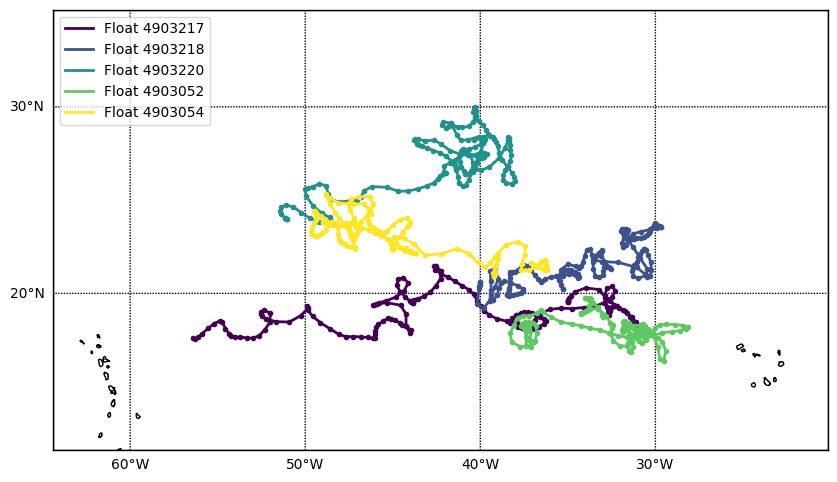

In [5]:
# Function to plot all trajectories from multiple files on the same map
def plot_all_trajectories(float_numbers):
    all_latitudes = []
    all_longitudes = []
    
    # Colors for each trajectory, cycle through them if more files than colors
    colors = plt.cm.get_cmap('viridis', len(float_numbers))

    # Read each file and collect all unique latitude and longitude pairs
    for float_number in float_numbers:
        data_file = os.path.join(DATA_DIR, f'PR_PF_{float_number}.csv')
        df = pd.read_csv(data_file)
        
        # Extract unique LATITUDE and LONGITUDE pairs
        unique_coords = df[['LATITUDE (degree_north)', 'LONGITUDE (degree_east)']].drop_duplicates()
        
        # Append the latitudes and longitudes to the list
        all_latitudes.extend(unique_coords['LATITUDE (degree_north)'].values)
        all_longitudes.extend(unique_coords['LONGITUDE (degree_east)'].values)

    # Find the bounding box for the zoom (min/max latitude and longitude)
    min_lat, max_lat = min(all_latitudes), max(all_latitudes)
    min_lon, max_lon = min(all_longitudes), max(all_longitudes)

    # Create a figure
    plt.figure(figsize=(10, 7))

    # Set up the Basemap projection, zoomed in to the area of the trajectories
    m = Basemap(projection='mill',  # Miller cylindrical projection
                llcrnrlat=min_lat - 5, urcrnrlat=max_lat + 5,  # Latitude range with some padding
                llcrnrlon=min_lon - 8, urcrnrlon=max_lon + 8,  # Longitude range with some padding
                resolution='i')  # 'i' stands for 'intermediate' resolution

    # Draw coastlines, countries, and map boundaries
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary()

    # Draw parallels and meridians (with labels)
    m.drawparallels(range(-90, 91, 10), labels=[1, 0, 0, 0])
    m.drawmeridians(range(-180, 181, 10), labels=[0, 0, 0, 1])

    # Plot each trajectory with a different color
    for i, float_number in enumerate(float_numbers):
        data_file = os.path.join(DATA_DIR, f'PR_PF_{float_number}.csv')
        df = pd.read_csv(data_file)
        
        # Extract unique LATITUDE and LONGITUDE pairs
        unique_coords = df[['LATITUDE (degree_north)', 'LONGITUDE (degree_east)']].drop_duplicates()
        
        latitudes = unique_coords['LATITUDE (degree_north)'].values
        longitudes = unique_coords['LONGITUDE (degree_east)'].values
        
        # Convert latitude and longitude into map projection coordinates and plot the trajectory
        x, y = m(longitudes, latitudes)
        color = colors(i)  # Get a different color for each file
        m.plot(x, y, marker=None, color=color, linewidth=2, label=f'Float {float_number}')  # Colored line for trajectory
        m.plot(x, y, 'o', color=color, markersize=3)  # Same color points for each stop on the trajectory

    # Add a legend to distinguish between different trajectories
    plt.legend(loc='upper left')
    
    # Save the figure
    figure_file = f'trajectories.png'
    plt.savefig(figure_file, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Usage example:
plot_all_trajectories(float_numbers)
